In [1]:
#pip install pyforest

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


data dict:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf


Hİnt for metric : Our mission to classify soldiers races via their body sclales. We want a balanced score for our predictions.

# Import libraries

In [2]:
import numpy as np
import pandas as pd

# import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Ingest the data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_m = pd.read_csv("ANSUR II MALE Public.csv").copy()
df_f = pd.read_csv("ANSUR II FEMALE Public.csv").copy()

# EDA
Tips :
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
- Find unusual value in Weightlbs

In [4]:
df_m.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [5]:
df_f.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
axillaheight,1180,1292,1271,1250,1210
balloffootcircumference,222,225,237,240,217
balloffootlength,177,178,196,188,182
biacromialbreadth,373,372,397,384,378
bicepscircumferenceflexed,315,272,300,364,320


In [6]:
df_m.shape,df_f.shape

((4082, 108), (1986, 108))

In [7]:
df_m.info(),df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


(None, None)

In [8]:
df_m.columns,df_f.columns

(Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
        'acromionradialelength', 'anklecircumference', 'axillaheight',
        'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
        'bicepscircumferenceflexed',
        ...
        'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
        'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
        'WritingPreference'],
       dtype='object', length=108),
 Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
        'acromionradialelength', 'anklecircumference', 'axillaheight',
        'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
        'bicepscircumferenceflexed',
        ...
        'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
        'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
        'WritingPreference'],
       dtype='object', length=108))

In [9]:
df = pd.concat([df_m,df_f])

In [10]:
df.shape

(6068, 109)

- **Female datasetinde farklı bir sütun var. Onu bulalım.**

In [11]:
df.isnull().sum()

subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [12]:
df.SubjectId.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: SubjectId, dtype: float64

In [13]:
df.subjectid.head()

0    10027.0
1    10032.0
2    10033.0
3    10092.0
4    10093.0
Name: subjectid, dtype: float64

- **df_f datasetinde subjectid sütunu ismi ayarlanmalıdır.**

In [14]:
df_f = df_f.rename(columns = {"SubjectId":"subjectid"})

In [15]:
df = pd.concat([df_m,df_f])

In [16]:
df.shape

(6068, 108)

In [17]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [18]:
df[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
5,1,1
6,2,2
7,1,1
8,1,1
9,1,1


- **SubjectNumericRace:** Deneğin kendi bildirdiği ırkı veya ırklarını gösteren tek veya çok basamaklı bir kod (interview yoluyla doğrulanır).
- **DODRace:** Birden fazla ırk seçmenin bir seçenek olmadığı durumlarda, deneğin kendi bildirdiği tercih edilen tek ırkı gösteren tek bir rakam. Bu değişkenin Defense Manpower Data Center demografik verileriyle karşılaştırılabilir olması amaçlanmıştır.

**SubjectNumericRace** Sütununu düşeriz.

In [19]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)

In [20]:
df.shape

(6068, 107)

In [21]:
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

- ***Instruction from Orion:*** Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
- DODRace sınıflandırmalarında value_counts 500 altında olanları düş.(Eğer value_counts 500 ün altında ise modelimiz öğrenemez.)

In [22]:
df_2 = df[df["DODRace"].isin([1,2,3])]

In [23]:
df_2.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

- **Instruction from Orion:** Find unusual value in Weightlbs
- Weightlbs'de olağandışı bir değer bulun

In [24]:
df_2.Weightlbs.value_counts(dropna = False)

170    224
180    219
150    216
175    204
160    203
185    202
165    194
190    186
200    173
155    154
210    147
140    146
195    142
145    140
135    117
220    113
215    109
130    100
205     96
225     76
230     71
148     55
125     53
168     53
178     52
120     49
240     48
158     46
187     44
138     43
235     42
153     41
198     41
162     35
174     35
167     35
173     34
128     34
127     33
147     33
250     33
143     32
172     32
169     32
182     31
183     31
152     31
157     31
156     31
188     31
137     30
154     30
193     29
184     28
196     28
194     28
163     28
197     28
142     27
192     26
181     26
177     26
132     25
176     24
161     22
245     22
212     22
115     21
218     21
164     21
186     21
203     21
133     21
204     20
189     20
110     20
166     19
171     19
208     19
124     18
139     18
118     18
207     18
206     18
136     18
149     18
179     18
141     18
260     17
144     17
255     16

In [25]:
df_2.Weightlbs.value_counts().sort_index(ascending=True)

0        1
86       1
88       1
90       1
95       3
96       1
98       1
100      5
101      1
102      2
103      6
104      2
105      8
106      3
107      2
108      5
109      3
110     20
111      4
112      6
113      3
114      8
115     21
116     16
117      8
118     18
119      6
120     49
121      5
122     12
123     12
124     18
125     53
126     14
127     33
128     34
129     11
130    100
131      9
132     25
133     21
134     16
135    117
136     18
137     30
138     43
139     18
140    146
141     18
142     27
143     32
144     17
145    140
146     13
147     33
148     55
149     18
150    216
151      6
152     31
153     41
154     30
155    154
156     31
157     31
158     46
159     12
160    203
161     22
162     35
163     28
164     21
165    194
166     19
167     35
168     53
169     32
170    224
171     19
172     32
173     34
174     35
175    204
176     24
177     26
178     52
179     18
180    219
181     26
182     31
183     31

<AxesSubplot:xlabel='Weightlbs', ylabel='Heightin'>

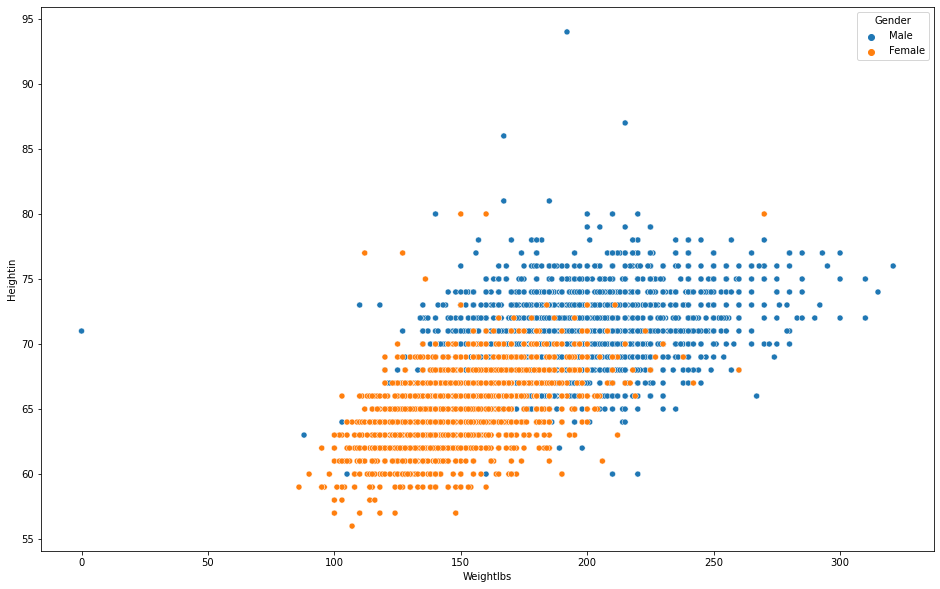

In [26]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_2, x="Weightlbs", y="Heightin", hue="Gender")

C:\Users\ContraVolta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


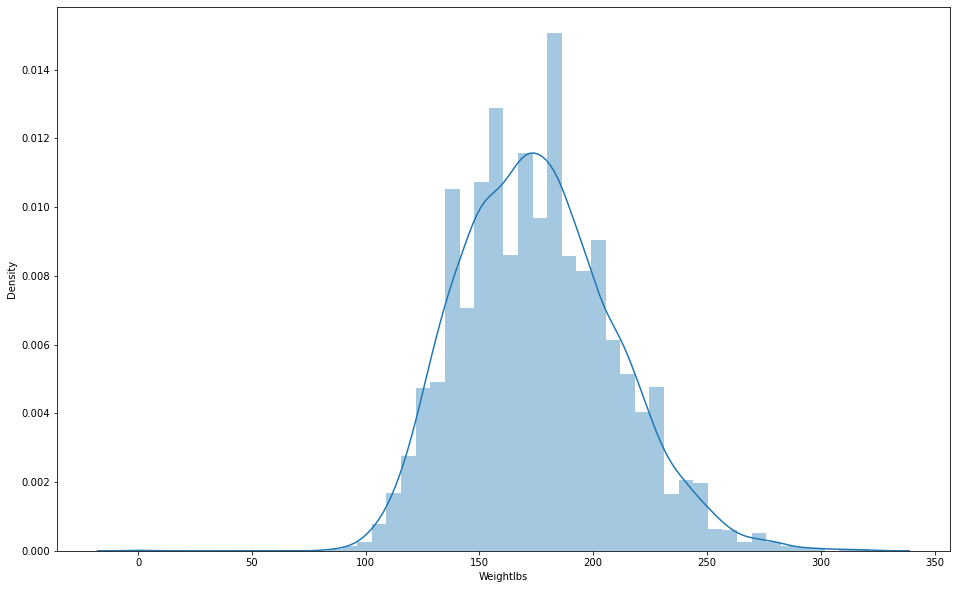

In [27]:
plt.figure(figsize=(16,10))
sns.distplot(df_2.Weightlbs, bins = 50);

- ***Average adult human weight varies by continent from about 60 kg (130 lb) in Asia and Africa to about 80 kg (180 lb) in North America, with men on average weighing more than women.***
- Ortalama yetişkin insan ağırlığı kıtaya göre Asya ve Afrika'da yaklaşık 60 kg (130 lb) ile Kuzey Amerika'da yaklaşık 80 kg (180 lb) arasında değişir ve erkeklerin ortalama ağırlığı kadınlardan daha fazladır.
- 100 lbs yani ~45 kg altındaki satırları drop ederiz.
- 270 lbs yani ~120 kg üzerindeki satırları da drop ederiz.

In [28]:
df_3 = df_2[(df_2['Weightlbs'] >= 100)&(df_2['Weightlbs'] <= 270)]

In [29]:
df_3.Weightlbs.value_counts().sort_index(ascending=True)

100      5
101      1
102      2
103      6
104      2
105      8
106      3
107      2
108      5
109      3
110     20
111      4
112      6
113      3
114      8
115     21
116     16
117      8
118     18
119      6
120     49
121      5
122     12
123     12
124     18
125     53
126     14
127     33
128     34
129     11
130    100
131      9
132     25
133     21
134     16
135    117
136     18
137     30
138     43
139     18
140    146
141     18
142     27
143     32
144     17
145    140
146     13
147     33
148     55
149     18
150    216
151      6
152     31
153     41
154     30
155    154
156     31
157     31
158     46
159     12
160    203
161     22
162     35
163     28
164     21
165    194
166     19
167     35
168     53
169     32
170    224
171     19
172     32
173     34
174     35
175    204
176     24
177     26
178     52
179     18
180    219
181     26
182     31
183     31
184     28
185    202
186     21
187     44
188     31
189     20
190    186

In [30]:
df_3.shape

(5726, 107)

_____

- **Aynı şekilde Boya bakalım**

In [31]:
df_3.Heightin.value_counts().sort_index()

56      1
57      5
58      4
59     26
60     70
61     89
62    207
63    248
64    368
65    299
66    522
67    485
68    511
69    604
70    548
71    533
72    462
73    280
74    227
75    110
76     64
77     31
78     15
79      5
80      7
81      2
86      1
87      1
94      1
Name: Heightin, dtype: int64

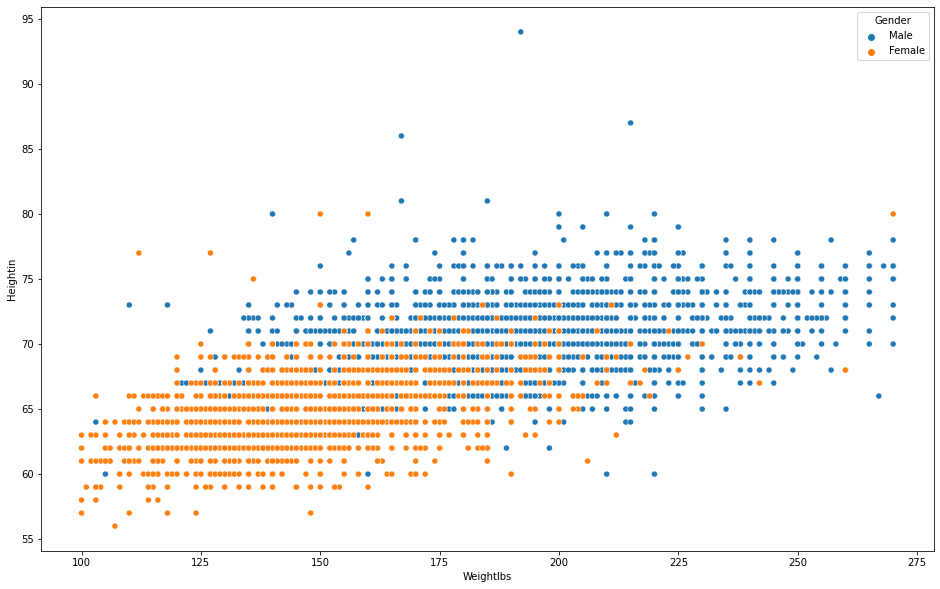

In [32]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_3, x="Weightlbs", y="Heightin", hue="Gender");

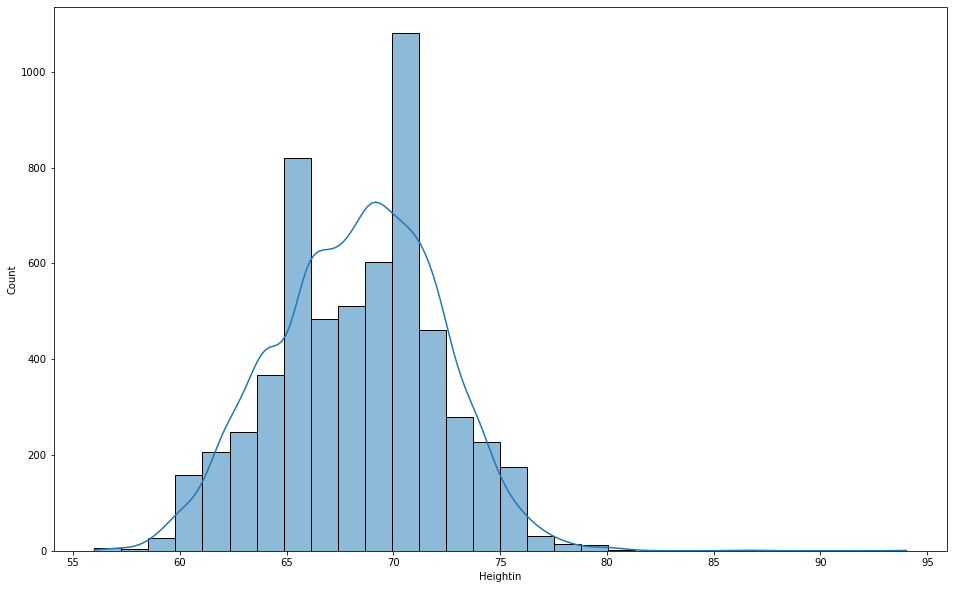

In [33]:
plt.figure(figsize=(16,10))
sns.histplot(df_3.Heightin, bins = 30, kde = True);

- 59 inch yani ~150 cm altındaki satırları drop ederiz.
- 80 inch yani ~203 cm üzerindeki satırları da drop ederiz.

In [34]:
df_3 = df_3[(df_3['Heightin'] >= 59)&(df_3['Heightin'] <= 80)]

In [35]:
df_3.Heightin.value_counts().sort_index()

59     26
60     70
61     89
62    207
63    248
64    368
65    299
66    522
67    485
68    511
69    604
70    548
71    533
72    462
73    280
74    227
75    110
76     64
77     31
78     15
79      5
80      7
Name: Heightin, dtype: int64

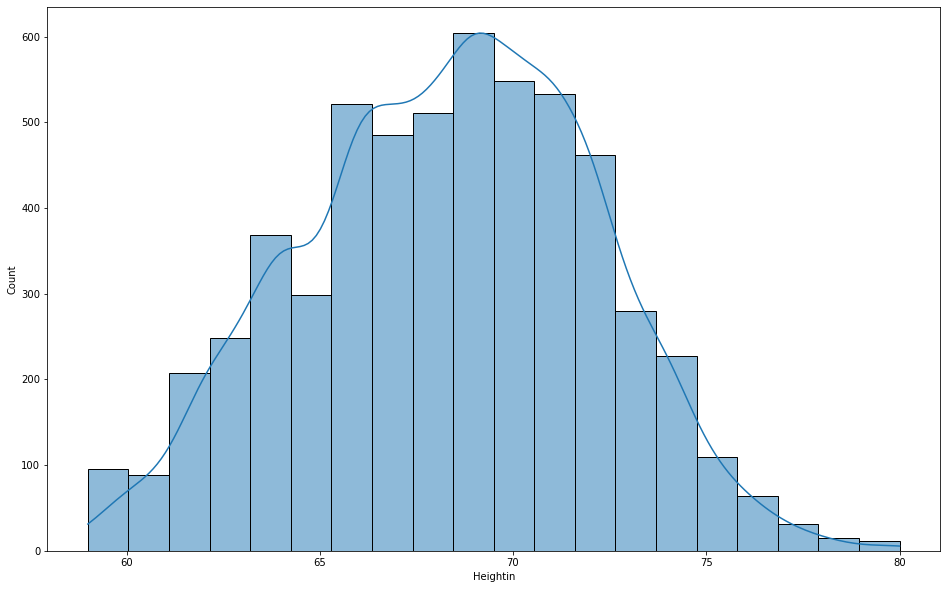

In [36]:
plt.figure(figsize=(16,10))
sns.histplot(df_3.Heightin, bins = 20, kde = True);

In [37]:
df_3.shape

(5711, 107)

___

In [38]:
df_3.SubjectsBirthLocation.value_counts(dropna=False).count()

135

In [39]:
df_3.SubjectsBirthLocation.nunique()

135

1. 135 tane farklı unique doğum yeri "string" getdummy ile modele sokulamaz
2. Bunlara genelleme yapılabilecek bir fonk yazmak zaman alır
3. **Model vücut tiplerine göre race tahmini yapacak. Dogum yerleri direk race i etkileyecegi icin bu sütunu da düsecegiz.**

In [40]:
df_3.drop("SubjectsBirthLocation", axis = 1, inplace = True)

In [41]:
df_3.shape

(5711, 106)

___

- **Instructions From Orion:** Our mission to classify soldiers races via their body scales. We want a balanced score for our predictions.
- Görevimiz, asker ırklarını vücut ölçeklerine göre sınıflandırmak. Tahminlerimiz için dengeli bir puan istiyoruz.

### Topluca gereksiz Sütunları Drop Edelim.

- ***Öncelikle kategorik olan verileri inceleyip gereksiz olanları düşelim.***

In [42]:
df_3.select_dtypes(exclude=[np.number]).head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Date,4-Oct-10,4-Oct-10,4-Oct-10,12-Oct-10,12-Oct-10
Installation,Fort Hood,Fort Hood,Fort Hood,Fort Hood,Fort Hood
Component,Regular Army,Regular Army,Regular Army,Regular Army,Regular Army
Branch,Combat Arms,Combat Support,Combat Support,Combat Service Support,Combat Service Support
PrimaryMOS,19D,68W,68W,88M,92G
Ethnicity,NaN,NaN,NaN,NaN,NaN
WritingPreference,Right hand,Left hand,Left hand,Right hand,Right hand


- ***Date*** sütunu drop edilecek.
- ***Installation*** sütunu drop edilecek.
- ***Component*** sütunu drop edilecek.
- ***Branch*** sütunu drop edilecek.
- ***PrimaryMOS*** sütunu drop edilecek.
- ***Date*** sütunu drop edilecek.
- ***WritingPreference*** sütunu drop edilecek.
- <span style="color:red">**!!!Ethnicity sütunu incelenmesi gerek!!!**</span>

In [43]:
df_3.Ethnicity.value_counts(dropna = False)

NaN                                                   4604
Mexican                                                352
Puerto Rican                                           179
Caribbean Islander                                     121
Cherokee                                                57
Dominican                                               32
Cuban                                                   17
Colombian                                               16
Arab or Middle Eastern                                  16
Salvadoran                                              16
Filipino                                                14
Japanese                                                12
Mexican Puerto Rican                                    10
Panamanian                                               9
Peruvian                                                 9
Dominican Puerto Rican                                   8
Honduran                                                

**SONUÇ:** Ethnicity de düşülecek. Çünkü Nan dolu ve modelimizin amacına uygun bir sütun değil. Sonuçta ölçüler ile tahmin yapacağız.

In [44]:
df_3.select_dtypes(exclude=[np.number]).columns  # gender hariç

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'Ethnicity', 'WritingPreference'],
      dtype='object')

In [45]:
df_3.drop(['Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', \
           'Ethnicity', 'WritingPreference'], axis = 1, inplace = True)

In [46]:
df_3.select_dtypes(exclude=[np.number]).head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male


In [47]:
df_3.shape

(5711, 99)

___

- ***Şimdi numeric olan verileri inceleyip gereksiz olanları düşelim.***

In [48]:
df_3.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
balloffootcircumference           0
balloffootlength                  0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
bimalleolarbreadth                0
bitragionchinarc                  0
bitragionsubmandibulararc         0
bizygomaticbreadth                0
buttockcircumference              0
buttockdepth                      0
buttockheight                     0
buttockkneelength                 0
buttockpopliteallength            0
calfcircumference                 0
cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
crotchheight                

In [49]:
df_3.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [50]:
df_3.drop(['subjectid', 'weightkg', 'Age'], axis=1,inplace=True)

In [51]:
df_3.shape

(5711, 96)

___

- **Target ile corr ilişkisi 0.1 altında olanlar drop edilir.**

In [61]:
abs(df_3.corr()["DODRace"]).sort_values(ascending=False)

DODRace                           1.000000
sittingheight                     0.327152
eyeheightsitting                  0.322500
wristheight                       0.271700
stature                           0.234742
Heightin                          0.230752
elbowrestheight                   0.229965
lateralmalleolusheight            0.219896
acromialheight                    0.219615
cervicaleheight                   0.217297
waistbacklength                   0.209925
axillaheight                      0.207325
bicristalbreadth                  0.205476
suprasternaleheight               0.205336
verticaltrunkcircumferenceusa     0.200208
chestheight                       0.195051
interpupillarybreadth             0.194162
shoulderelbowlength               0.179145
wristcircumference                0.175946
waistheightomphalion              0.175319
overheadfingertipreachsitting     0.171644
heelbreadth                       0.168201
anklecircumference                0.160868
waistfrontl

In [62]:
round(abs(df_3.corr()["DODRace"]).sort_values(ascending=False), 3)

DODRace                           1.000
sittingheight                     0.327
eyeheightsitting                  0.322
wristheight                       0.272
stature                           0.235
Heightin                          0.231
elbowrestheight                   0.230
lateralmalleolusheight            0.220
acromialheight                    0.220
cervicaleheight                   0.217
waistbacklength                   0.210
axillaheight                      0.207
bicristalbreadth                  0.205
suprasternaleheight               0.205
verticaltrunkcircumferenceusa     0.200
chestheight                       0.195
interpupillarybreadth             0.194
shoulderelbowlength               0.179
wristcircumference                0.176
waistheightomphalion              0.175
overheadfingertipreachsitting     0.172
heelbreadth                       0.168
anklecircumference                0.161
waistfrontlengthsitting           0.160
handbreadth                       0.160


In [63]:
# df_logmodel Logistic Regresyon modelinde kullanılacak data frame.
df_logmodel = df_3.copy()

In [64]:
df_logmodel.shape

(5711, 96)

In [65]:
liste = []
for i in round(abs(df_3.corr()["DODRace"]).sort_values(ascending=False), 3).index:
    if round(abs(df_3.corr()["DODRace"]).sort_values(ascending=False), 3)[i] < 0.1:
        liste.append(i)
liste

['sleeveoutseam',
 'buttockheight',
 'earprotrusion',
 'calfcircumference',
 'lateralfemoralepicondyleheight',
 'earlength',
 'forearmforearmbreadth',
 'forearmcircumferenceflexed',
 'bitragionchinarc',
 'chestcircumference',
 'shouldercircumference',
 'span',
 'shoulderlength',
 'heelanklecircumference',
 'hipbreadth',
 'bideltoidbreadth',
 'waistcircumference',
 'footlength',
 'buttockkneelength',
 'thumbtipreach',
 'earbreadth',
 'balloffootlength',
 'footbreadthhorizontal',
 'tragiontopofhead',
 'buttockpopliteallength',
 'forearmhandlength',
 'thighcircumference',
 'bizygomaticbreadth',
 'forearmcenterofgriplength',
 'abdominalextensiondepthsitting',
 'bicepscircumferenceflexed',
 'waistdepth',
 'handlength',
 'buttockcircumference',
 'chestdepth',
 'bitragionsubmandibulararc',
 'mentonsellionlength',
 'radialestylionlength',
 'headbreadth',
 'hipbreadthsitting',
 'headcircumference',
 'lowerthighcircumference',
 'palmlength',
 'buttockdepth',
 'thighclearance']

In [66]:
df_3.drop(liste, axis = 1, inplace = True)

In [67]:
# diğer modeller için kullanılacak dataframe
df_3.shape

(5711, 51)

In [70]:
df_logmodel = pd.get_dummies(data=df_logmodel, drop_first=True)
df_3 = pd.get_dummies(data=df_3, drop_first=True)

In [71]:
df_logmodel.shape,df_3.shape

((5711, 96), (5711, 51))

___

# DATA Preprocessing

In [72]:
X=df_3.drop("DODRace", axis=1)
y=df_3.DODRace 

In [73]:
X_log=df_logmodel.drop("DODRace", axis=1)
y_log=df_logmodel.DODRace 

In [86]:
from sklearn.model_selection import train_test_split
X_log_train,X_log_test,y_log_train,y_log_test=train_test_split(X_log,y_log,test_size=0.3, random_state=101)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

# Modelling Implementing
- You can use pipeline (optional)
- You can research over/undersampling methods and after selecting the best model, examine it to see if better scores can be obtained. (https://imbalanced-learn.org/stable/introduction.html)

## 1. Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
X_log_train_scaled = scaler.fit_transform(X_log_train)
X_log_test_scaled = scaler.transform(X_log_test)

In [92]:
log_model = LogisticRegression(multi_class="ovr",max_iter=5000, class_weight="balanced")
penalty = ["l1", "l2"]
l1_ratio = np.linspace(0, 1, 3)  
C = np.logspace(0, 10, 3) 

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [93]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, n_jobs= -1)

In [94]:
grid_model.fit(X_log_train_scaled,y_log_train)

C:\Users\ContraVolta\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.83937766        nan 0.83937766        nan 0.83937766
        nan 0.83837328        nan 0.83837328        nan 0.83837328
        nan 0.83862328        nan 0.83862328        nan 0.83862328]
  warnings.warn(
C:\Users\ContraVolta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, multi_class='ovr'),
             n_jobs=-1,
             param_grid={'C': array([1.e+00, 1.e+05, 1.e+10]),
                         'l1_ratio': array([0. , 0.5, 1. ]),
                         'penalty': ['l1', 'l2']})

In [95]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [96]:
%%time
y_log_pred = grid_model.predict(X_log_test_scaled)
y_log_pred

Wall time: 7.99 ms


array([1, 2, 1, ..., 2, 1, 1], dtype=int64)

In [98]:
print(confusion_matrix(y_log_test, y_log_pred))
print(classification_report(y_log_test, y_log_pred))

[[985  26 129]
 [ 14 330  19]
 [ 59  29 123]]
              precision    recall  f1-score   support

           1       0.93      0.86      0.90      1140
           2       0.86      0.91      0.88       363
           3       0.45      0.58      0.51       211

    accuracy                           0.84      1714
   macro avg       0.75      0.79      0.76      1714
weighted avg       0.86      0.84      0.85      1714



____

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [100]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
log_model = LogisticRegression(multi_class="ovr",max_iter=5000, class_weight="balanced")
penalty = ["l1", "l2"]
l1_ratio = np.linspace(0, 1, 3)  
C = np.logspace(0, 10, 3) 

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [103]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, n_jobs= -1)

Wall time: 0 ns


In [104]:
%%time
grid_model.fit(X_train_scaled,y_train)

C:\Users\ContraVolta\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79109512        nan 0.79109512        nan 0.79109512
        nan 0.79059199        nan 0.79059199        nan 0.79059199
        nan 0.79034199        nan 0.79034199        nan 0.79034199]
  warnings.warn(
C:\Users\ContraVolta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


Wall time: 31.3 s


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, multi_class='ovr'),
             n_jobs=-1,
             param_grid={'C': array([1.e+00, 1.e+05, 1.e+10]),
                         'l1_ratio': array([0. , 0.5, 1. ]),
                         'penalty': ['l1', 'l2']})

In [105]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [106]:
y_pred = grid_model.predict(X_test_scaled)

In [107]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[924  58 158]
 [ 25 313  25]
 [ 67  38 106]]
              precision    recall  f1-score   support

           1       0.91      0.81      0.86      1140
           2       0.77      0.86      0.81       363
           3       0.37      0.50      0.42       211

    accuracy                           0.78      1714
   macro avg       0.68      0.73      0.70      1714
weighted avg       0.81      0.78      0.79      1714



- <span style="color:red">RAIFE WIN</span>
- **Korelasyonu target ile 0.1 den düşük olan featureları düşürmek skorumuzu düşük verdi. O yüzden modellerimize 96 adet sütunu olan df_logmodel dataframe inden ilerliyoruz.**

## 2. Support Vector Classifier

## 3. Random Forest

## 4. XGBoost

# Choose the best model based on the metric you choose and make a random prediction

---
---